<a href="https://colab.research.google.com/github/VISHVAPRASATHVS/Classification-using-LSTM/blob/main/MNIST_Handwritten_Digit_Classification_using_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input , LSTM , Dense , Bidirectional
from tensorflow.keras.models import Model
import tensorflow.keras.datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [ ]:
(train_images , train_labels) , (test_images , test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000 , 28 ,28)).astype('float32') / 255.0
test_images = test_images.reshape((10000 , 28 ,28)).astype('float32') /255.0

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape , test_images.shape , train_labels.shape , test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000, 10), (10000, 10))

In [ ]:
input_shape = (28, 28)

inputs = Input(shape=input_shape)

x = Bidirectional(
        LSTM(128, return_sequences=False)
    )(inputs)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images , train_labels , epochs = 15 , validation_data = (test_images , test_labels))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7993 - loss: 0.5937 - val_accuracy: 0.9636 - val_loss: 0.1173
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9694 - loss: 0.0983 - val_accuracy: 0.9805 - val_loss: 0.0646
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9797 - loss: 0.0660 - val_accuracy: 0.9826 - val_loss: 0.0583
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9850 - loss: 0.0483 - val_accuracy: 0.9837 - val_loss: 0.0554
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9842 - val_loss: 0.0549
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9892 - loss: 0.0322 - val_accuracy: 0.9867 - val_loss: 0.0426
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9917 - loss: 0.0272 - val_accuracy: 0.9874 - val_loss: 0.0414
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9921 - loss: 0

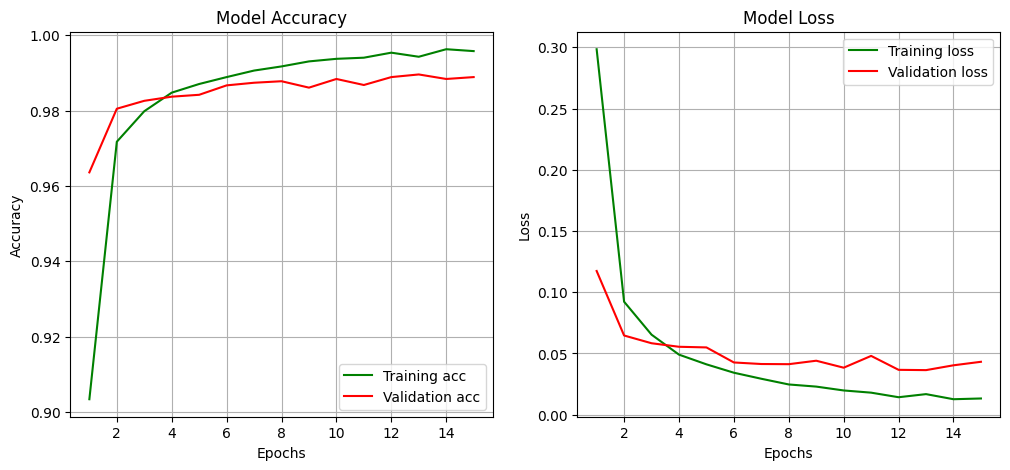

In [ ]:
epochs = range(1,16)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12 , 5))

plt.subplot(1 , 2 , 1)
plt.plot(epochs , acc , label = 'Training acc' , c = 'g')
plt.plot(epochs , val_acc , label = 'Validation acc' , c = 'r')
plt.title('Model Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1 , 2 , 2)
plt.plot(epochs , loss , label = 'Training loss' , c = 'g')
plt.plot(epochs , val_loss , label = 'Validation loss' , c = 'r')
plt.title('Model Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
accuracy_score = model.evaluate(test_images , test_labels)
accuracy_score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9849 - loss: 0.0578


[0.04316848888993263, 0.9889000058174133]

In [ ]:
#For metrics
import numpy as np

y_true_classes = np.argmax(test_labels, axis=1)
# Get model predictions and convert probabilities to class indices
y_pred_probs = model.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      1.00      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

